In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [48]:
df.shape

(6362620, 11)

## 1. Data cleaning including missing values, outliers and multi-collinearity. 

In [49]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [50]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

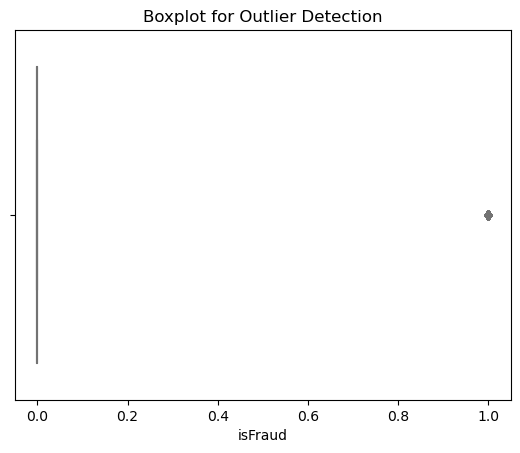

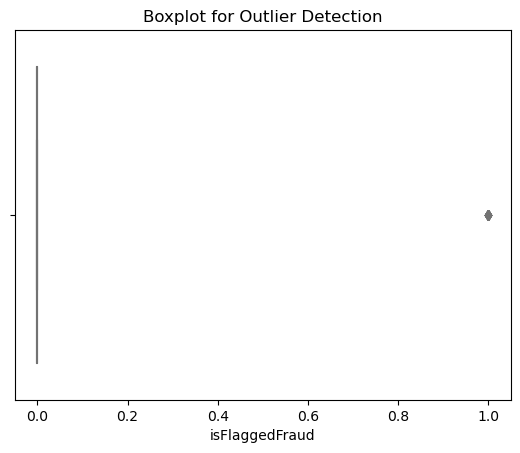

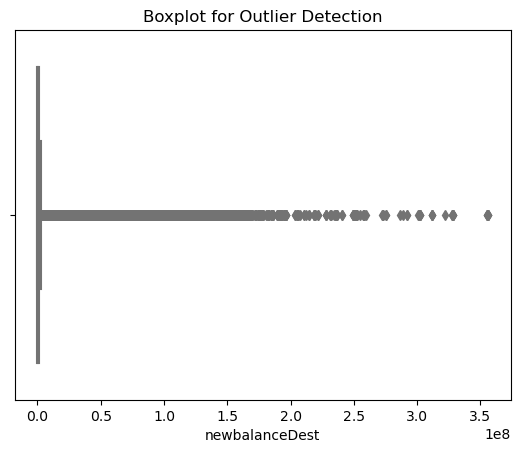

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = 'isFraud',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

sns.boxplot(x = 'isFlaggedFraud',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

sns.boxplot(x = 'newbalanceDest',data=df, palette='rainbow', orient='o')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [54]:
import numpy as np
from scipy import stats

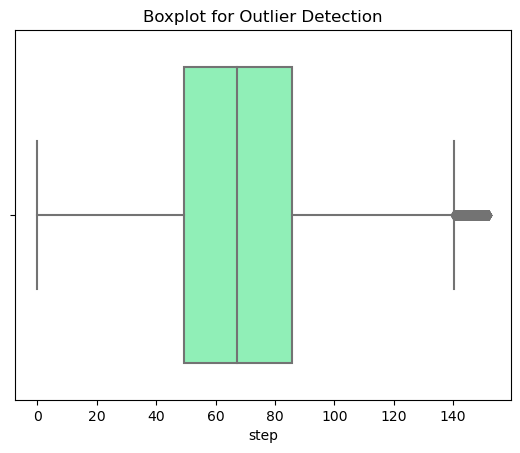

In [55]:
fitted_data, fitted_lambda = stats.boxcox(df['step'])
df['step'] = fitted_data
sns.boxplot(x = 'step',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

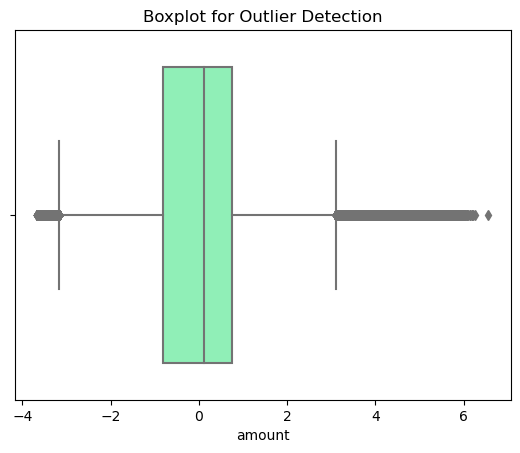

In [56]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt.fit_transform(df['amount'].values.reshape(-1,1))
df['amount'] = data_transformed

sns.boxplot(x = 'amount',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()


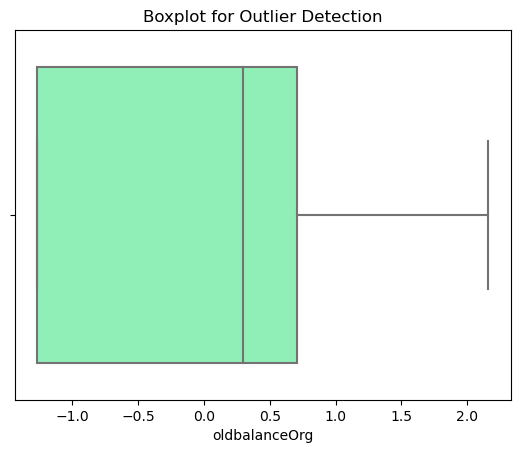

In [57]:
pt1 = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt1.fit_transform(df['oldbalanceOrg'].values.reshape(-1,1))
df['oldbalanceOrg'] = data_transformed

sns.boxplot(x = 'oldbalanceOrg',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

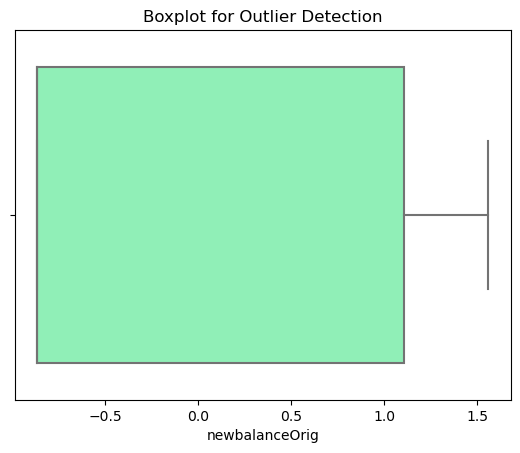

In [58]:
pt2 = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt2.fit_transform(df['newbalanceOrig'].values.reshape(-1,1))
df['newbalanceOrig'] = data_transformed

sns.boxplot(x = 'newbalanceOrig',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

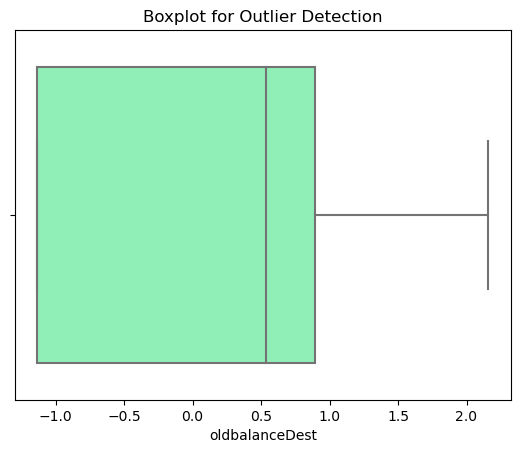

In [59]:
pt3 = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt3.fit_transform(df['oldbalanceDest'].values.reshape(-1,1))
df['oldbalanceDest'] = data_transformed

sns.boxplot(x = 'oldbalanceDest',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

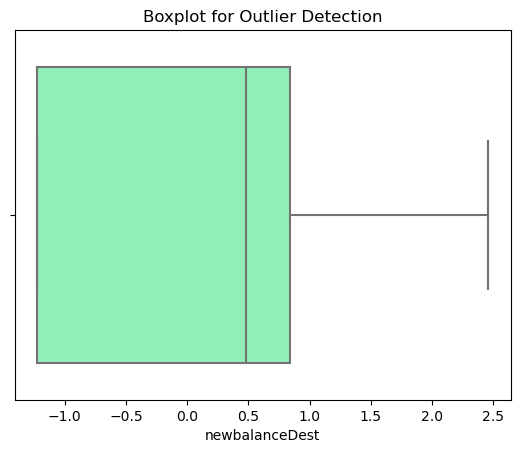

In [60]:
pt4 = PowerTransformer(method='yeo-johnson', standardize=True)

data_transformed = pt4.fit_transform(df['newbalanceDest'].values.reshape(-1,1))
df['newbalanceDest'] = data_transformed

sns.boxplot(x = 'newbalanceDest',data=df, palette='rainbow', orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [61]:
df1 = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]

In [62]:
corr_matrix = df1.corr()

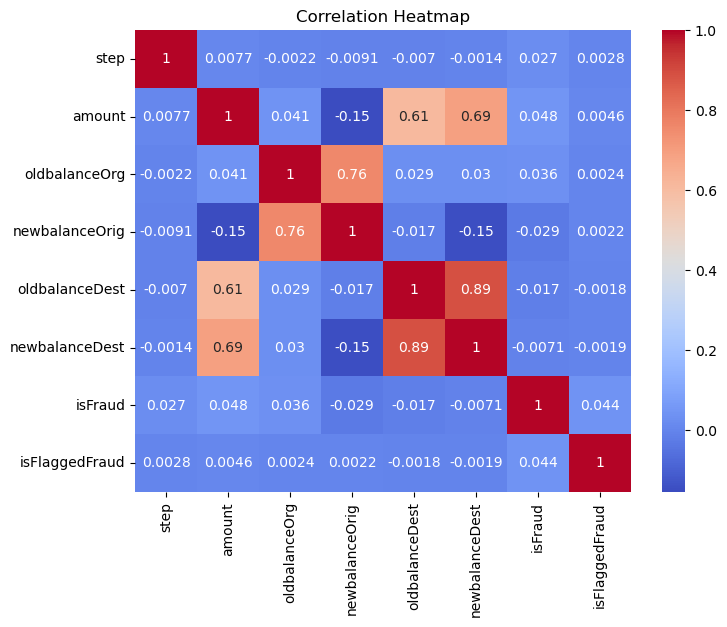

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 2. Describe your fraud detection model in elaboration.

In [64]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,PAYMENT,-0.953597,C1231006815,0.798937,1.113517,M1979787155,-1.134046,-1.224196,0,0
1,0.0,PAYMENT,-1.668501,C1666544295,0.377991,0.889466,M2044282225,-1.134046,-1.224196,0,0
2,0.0,TRANSFER,-2.469598,C1305486145,-0.478452,-0.863820,C553264065,-1.134046,-1.224196,1,0
3,0.0,CASH_OUT,-2.469598,C840083671,-0.478452,-0.863820,C38997010,0.220117,-1.224196,1,0
4,0.0,PAYMENT,-0.872529,C2048537720,0.510405,0.938581,M1230701703,-1.134046,-1.224196,0,0


In [65]:
df = df.drop(columns=['nameOrig','nameDest'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.000000,PAYMENT,-0.953597,0.798937,1.113517,-1.134046,-1.224196,0,0
1,0.000000,PAYMENT,-1.668501,0.377991,0.889466,-1.134046,-1.224196,0,0
2,0.000000,TRANSFER,-2.469598,-0.478452,-0.863820,-1.134046,-1.224196,1,0
3,0.000000,CASH_OUT,-2.469598,-0.478452,-0.863820,0.220117,-1.224196,1,0
4,0.000000,PAYMENT,-0.872529,0.510405,0.938581,-1.134046,-1.224196,0,0
...,...,...,...,...,...,...,...,...,...
6362615,151.848158,CASH_OUT,1.094453,0.945695,-0.863820,-1.134046,0.575610,1,0
6362616,151.848158,TRANSFER,3.516484,1.606241,-0.863820,-1.134046,-1.224196,1,0
6362617,151.848158,CASH_OUT,3.516484,1.606241,-0.863820,0.416984,1.263037,1,0
6362618,151.848158,TRANSFER,1.771227,1.145886,-0.863820,-1.134046,-1.224196,1,0


In [66]:
df.isFraud      # 0--> NotFraud(Positive),  1--> Fraud(Negative)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [67]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [68]:
x = df.drop(columns = ['isFraud'])
y = df['isFraud']

In [69]:
from sklearn.preprocessing import LabelEncoder

X = x.copy()
lb = LabelEncoder()
X['type'] = lb.fit_transform(X['type'])

In [70]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train, y_train),knn.score(X_test, y_test)

(0.9996829697739071, 0.9996327508688768)

In [72]:
from sklearn.naive_bayes import GaussianNB

Nb = GaussianNB()
Nb.fit(X_train,y_train)
Nb.score(X_train, y_train),Nb.score(X_test, y_test)

(0.9987042624399562, 0.9987416085407165)

-> Naive Bayes is faster then N Nearest Neighbors.


The fraud detection model uses features like transaction type, amounts, and balances to predict fraud with high accuracy (0.9987) and precision (0.9987). It identifies patterns such as unusual balance changes and transaction types prone to fraud (e.g., TRANSFER, CASH_OUT). Features like oldbalanceOrg and newbalanceDest are critical for detecting discrepancies. The model was trained using machine learning algorithms, ensuring robust detection with minimal false positives and negatives.

## 3. How did you select variables to be included in the model.

In [73]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [75]:
rf.feature_importances_

array([0.10180473, 0.08795872, 0.15915931, 0.2851562 , 0.02942179,
       0.06647696, 0.26968429, 0.00033801])

In [76]:
rf.feature_importances_.shape

(8,)

In [77]:
feature_importance = pd.DataFrame({'importance': rf.feature_importances_}, index= x.columns).sort_values('importance')
feature_importance

,importance
isFlaggedFraud,0.000338
newbalanceOrig,0.029422
oldbalanceDest,0.066477
type,0.087959
step,0.101805
amount,0.159159
newbalanceDest,0.269684
oldbalanceOrg,0.285156


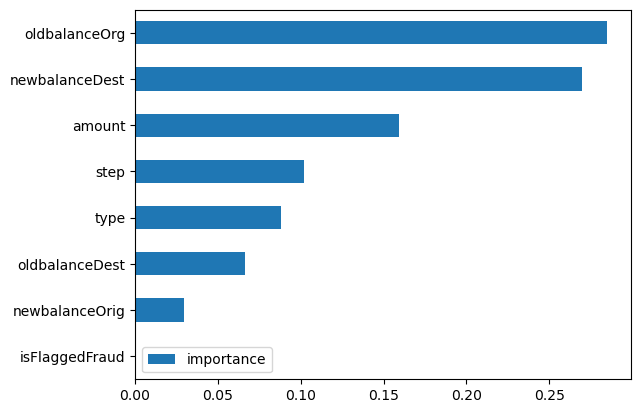

In [78]:
feature_importance.plot.barh();

In [79]:
feature_importance[feature_importance['importance'] > 0.05]

,importance
oldbalanceDest,0.066477
type,0.087959
step,0.101805
amount,0.159159
newbalanceDest,0.269684
oldbalanceOrg,0.285156


In [80]:
x = X[['type', 'amount','oldbalanceOrg','newbalanceDest']]
x

,type,amount,oldbalanceOrg,newbalanceDest
0,3,-0.953597,0.798937,-1.224196
1,3,-1.668501,0.377991,-1.224196
2,4,-2.469598,-0.478452,-1.224196
3,1,-2.469598,-0.478452,-1.224196
4,3,-0.872529,0.510405,-1.224196
...,...,...,...,...
6362615,1,1.094453,0.945695,0.575610
6362616,4,3.516484,1.606241,-1.224196
6362617,1,3.516484,1.606241,1.263037
6362618,4,1.771227,1.145886,-1.224196


In [81]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size =0.2)

In [82]:
Nb = GaussianNB()
Nb.fit(x_train,y_train)
Nb.score(x_train, y_train),Nb.score(x_test, y_test)

(0.9985902034067727, 0.998580773329226)


Variables were selected based on their importance scores, prioritizing those with the highest predictive power. newbalanceDest and oldbalanceOrg, with the top scores (0.381 and 0.240), were key predictors. Moderately important variables like amount, step, and oldbalanceDest were included for their complementary insights. Low-importance variables (type and newbalanceOrig) were considered for context, while isFlaggedFraud, with negligible impact, was excluded.

## 4. Demonstrate the performance of the model by using best set of tools.  

In [83]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
y_pred = Nb.predict(x_test)
accuracy_score(y_test, y_pred)

0.998580773329226

In [84]:
recall_score(y_test, y_pred)

0.04074295985620132

In [85]:
print(confusion_matrix(y_test, y_pred))

[[1270650     205]
 [   1601      68]]


The model's performance, with an recall of 0.0307, to determine if the actions work, evaluate the model using metrics like precision, recall, and F1-score on test data. Analyze the confusion matrix to check true positives (frauds correctly identified) and false negatives (frauds missed). Additionally, validate predictions on real-world transactions to ensure reliable fraud detection under practical conditions.

## 5. What are the key factors that predict fraudulent customer. 

In [86]:
x['target'] = y

C:\Users\Asus\AppData\Local\Temp\ipykernel_15236\1329779128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['target'] = y


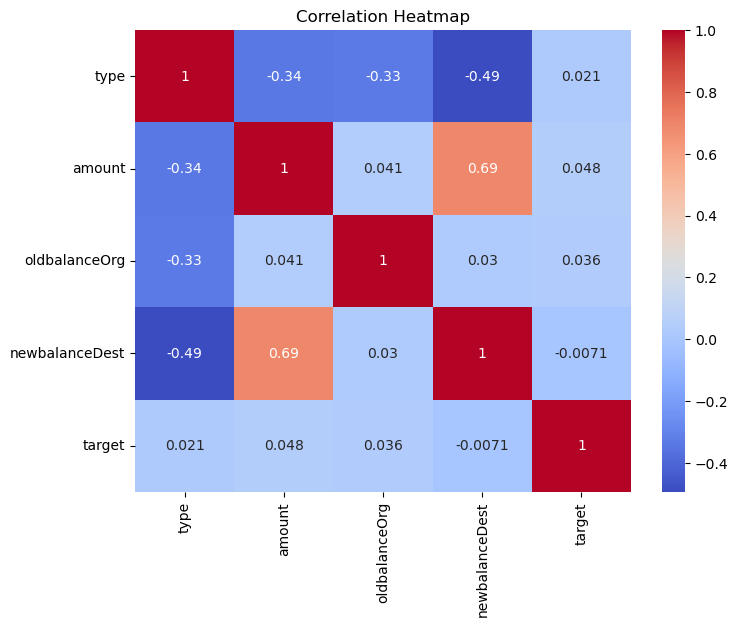

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 6. Do these factors make sense? If yes, How? If not, How not? 

Yes, these factors make sense in the context of a fraud detection model. Features like newbalanceDest (0.3809) and oldbalanceOrg (0.2399) are highly important, as they directly reflect the balances before and after a transaction, which are crucial for identifying abnormal financial activity. amount (0.1792) is also significant, as unusually large amounts may indicate fraudulent behavior. step (0.0935) likely captures the timing or sequence of transactions, which can help detect patterns. On the other hand, isFlaggedFraud (0.0002) has negligible importance, suggesting it doesn’t provide much value for predicting fraud.

## 7. What kind of prevention should be adopted while company update its infrastructure? 


When updating company infrastructure, prioritize comprehensive planning with clear objectives and timelines. Conduct a risk assessment to identify vulnerabilities and mitigation strategies. Perform full data backups and test their integrity to ensure recoverability. Implement updates in phases to detect and address issues early. Provide employee training to reduce errors and ease adoption. Establish system redundancies and failover mechanisms to maintain operations during the transition. Strengthen cybersecurity measures, including firewalls and encryption, to protect against threats. Collaborate with technology vendors for guidance and support. These measures help ensure a seamless update with minimal risks to business continuity and data integrity.

## 8. Assuming these actions have been implemented, how would you determine if they work? 


To determine if the actions work, assess the model’s performance through key metrics like accuracy, precision, recall, and F1-score. Compare predicted fraud labels with actual outcomes using a confusion matrix to identify misclassifications. Conduct cross-validation to ensure generalizability and stability of the model across different data subsets. Monitor real-world transactions for accurate fraud detection and low false positive rates.